<a href="https://colab.research.google.com/github/ahmadcah/project_pembelajaran_mesin_2018-198/blob/main/GoogleColab/trainPlacesModelModul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/p365s

In [ ]:
!rm -rf /content/places365_standard

In [ ]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [ ]:
import tarfile

tar = tarfile.open("/content/drive/MyDrive/Data/places365standard_easyformat.tar", "r:")
tar.extractall(path='/content')
tar.close()

In [ ]:
import os

def count_file(target):
  totalImageFile = 0
  for f in os.listdir(target):
    for i in os.listdir(target+"/"+f):
      totalImageFile +=1
  print(totalImageFile)

In [ ]:
count_file("/content/places365_standard/train")
count_file("/content/places365_standard/val")

1803460
36500


In [ ]:
print(1803460+36500)

1839960


In [ ]:
total = 1839960
train = int(total*0.80)
valid = int(total*0.19)
test = int(total*0.01)
print("total: ",total,"train: ",train,"valid: ",valid,"test: ",test)

total:  1839960 train:  1471968 valid:  349592 test:  18399


In [ ]:
import shutil
valF = "/content/places365_standard/val"
for f in os.listdir(valF):
  t = valF+"/"+f
  for i in os.listdir(t):
    original = t+"/"+i
    target = '/content/places365_standard/train/'+f+"/"+i
    shutil.move(original,target)

In [ ]:
count_file("/content/places365_standard/train")
count_file("/content/places365_standard/val")

1839960
0


In [ ]:
root = "/content/p365s"
train_dir = "/content/p365s/train"
valid_dir = "/content/p365s/valid"
testi_dir = "/content/p365s/testing" 
os.mkdir(root)
os.mkdir(train_dir)
os.mkdir(valid_dir)
os.mkdir(testi_dir)
for i in os.listdir("/content/places365_standard/train"):
  os.mkdir(train_dir+"/"+i)
  os.mkdir(valid_dir+"/"+i)
  os.mkdir(testi_dir+"/"+i)

In [ ]:
print(len(os.listdir(train_dir)))
print(len(os.listdir(valid_dir)))
print(len(os.listdir(testi_dir)))

365
365
365


In [ ]:
import random

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, VAL_SIZE, TEST_SIZE):
    l = len(os.listdir(SOURCE))
    VAL_limit = int(l * VAL_SIZE)
    TEST_limit = int(l * TEST_SIZE)
    for i, f in enumerate(random.sample(os.listdir(SOURCE), l)):
        if os.path.getsize(SOURCE + "/" + f) > 0:
            if i < TEST_limit:
                shutil.move(SOURCE + "/" + f, TESTING + "/" + f)
            elif i >= TEST_limit and i < VAL_limit+TEST_limit:
                shutil.move(SOURCE + "/" + f, VALIDATION + "/" + f)
            else:
              shutil.move(SOURCE + "/" + f, TRAINING + "/" + f)
        else:
            print(f + " is zero length, so ignoring")

In [ ]:
roots = "/content/places365_standard/train"
for f in os.listdir(roots):
  SOURCE = roots+"/"+f
  TRAINING = train_dir+"/"+f
  VALIDATION = valid_dir+"/"+f
  TESTING = testi_dir+"/"+f
  VAL_SIZE = 0.19
  TEST_SIZE = 0.01
  split_data(SOURCE, TRAINING, VALIDATION, TESTING, VAL_SIZE, TEST_SIZE)

In [ ]:
count_file("/content/places365_standard/train")
count_file("/content/places365_standard/val")

0
0


In [ ]:
import tensorflow as tf

bs = 32

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=bs)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
	valid_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=bs)

testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

testing_generator = validation_datagen.flow_from_directory(
	testi_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=bs)

Found 1471994 images belonging to 365 classes.
Found 349578 images belonging to 365 classes.
Found 18388 images belonging to 365 classes.


In [ ]:
ltc = len(train_generator.classes) 
lvc = len(validation_generator.classes)
ltsc = len(testing_generator.classes) 
totalgen = ltc + lvc + ltsc
print("gen total: ",totalgen)
print("train: ",ltc/totalgen*100,"%")
print("valid: ",lvc/totalgen*100,"%")
print("testi: ",ltsc/totalgen*100,"%")

gen total:  1839960
train:  80.00141307419727 %
valid:  18.999217374290744 %
testi:  0.9993695515119894 %


In [ ]:
total = 1839960
train = int(total*0.80)
valid = int(total*0.19)
test = int(total*0.01)
print("total: ",total,"train: ",train,"valid: ",valid,"test: ",test)

total:  1839960 train:  1471968 valid:  349592 test:  18399


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(365, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 128)     73856     
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 127, 127, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 127, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 128)       0

In [ ]:
callbacksEarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
class CallbackAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('acc') > 0.98 and logs.get('val_acc') > 0.98:
            self.model.stop_training = True

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [ ]:
spe = ltc //bs
print(spe)
vs = len(validation_generator.classes)//bs
print(vs)

45999
10924


In [ ]:
history = model.fit(train_generator, 
                    epochs=100, 
                    steps_per_epoch=64,
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=32)

Epoch 1/100
64/64 [==============================] - 53s 532ms/step - loss: 9.2808 - acc: 0.0054 - val_loss: 6.6940 - val_acc: 0.0029
Epoch 2/100
64/64 [==============================] - 34s 526ms/step - loss: 6.2033 - acc: 0.0034 - val_loss: 7.8833 - val_acc: 0.0029
Epoch 3/100
64/64 [==============================] - 34s 523ms/step - loss: 6.0190 - acc: 0.0044 - val_loss: 6.0183 - val_acc: 0.0020
Epoch 4/100
64/64 [==============================] - 33s 519ms/step - loss: 5.9342 - acc: 0.0034 - val_loss: 6.0772 - val_acc: 0.0049
Epoch 5/100
64/64 [==============================] - 34s 523ms/step - loss: 6.0010 - acc: 0.0020 - val_loss: 8.8730 - val_acc: 0.0000e+00
Epoch 6/100
64/64 [==============================] - 34s 523ms/step - loss: 5.9255 - acc: 0.0024 - val_loss: 5.9066 - val_acc: 0.0049
Epoch 7/100
64/64 [==============================] - 34s 521ms/step - loss: 5.9024 - acc: 0.0049 - val_loss: 5.9007 - val_acc: 0.0020
Epoch 8/100
64/64 [==============================] - 34s 5

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(365, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 254, 254, 128)     73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 254, 254, 128)     512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 127, 127, 128)     147584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 127, 127, 128)     512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 128)      

In [ ]:
model2.compile(loss = 'categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), 
              metrics=['acc'])

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config = config)

In [ ]:
history2 = model2.fit(train_generator, 
                    epochs=100, 
                    steps_per_epoch=64,
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=32)

Epoch 1/100
64/64 [==============================] - 34s 507ms/step - loss: 45.8133 - acc: 0.0029 - val_loss: 5.9389 - val_acc: 0.0039
Epoch 2/100
64/64 [==============================] - 32s 504ms/step - loss: 6.8380 - acc: 0.0034 - val_loss: 5.9616 - val_acc: 0.0029
Epoch 3/100
64/64 [==============================] - 32s 502ms/step - loss: 5.9129 - acc: 0.0054 - val_loss: 6.1926 - val_acc: 0.0029
Epoch 4/100
64/64 [==============================] - 32s 504ms/step - loss: 5.9133 - acc: 0.0020 - val_loss: 5.9128 - val_acc: 0.0020
Epoch 5/100
64/64 [==============================] - 32s 503ms/step - loss: 5.9147 - acc: 0.0015 - val_loss: 5.9135 - val_acc: 0.0020
Epoch 6/100
64/64 [==============================] - 32s 495ms/step - loss: 6.2710 - acc: 0.0034 - val_loss: 48.6008 - val_acc: 0.0020
Epoch 7/100
64/64 [==============================] - 32s 500ms/step - loss: 5.9175 - acc: 0.0020 - val_loss: 6.1752 - val_acc: 0.0039
Epoch 8/100
64/64 [==============================] - 32s 497

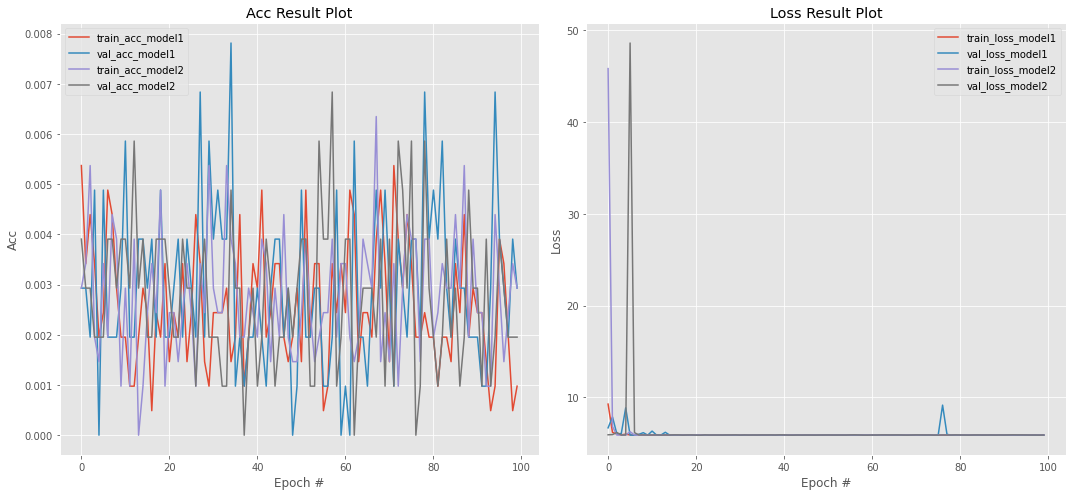

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].plot(np.arange(0, 100), history.history["acc"], label="train_acc_model1")
axes[0].plot(np.arange(0, 100), history.history["val_acc"], label="val_acc_model1")
axes[0].plot(np.arange(0, 100), history2.history["acc"], label="train_acc_model2")
axes[0].plot(np.arange(0, 100), history2.history["val_acc"], label="val_acc_model2")
axes[0].legend()
axes[1].plot(np.arange(0, 100), history.history["loss"], label="train_loss_model1")
axes[1].plot(np.arange(0, 100), history.history["val_loss"], label="val_loss_model1")
axes[1].plot(np.arange(0, 100), history2.history["loss"], label="train_loss_model2")
axes[1].plot(np.arange(0, 100), history2.history["val_loss"], label="val_loss_model2")
axes[1].legend()
plt.setp(axes[0],title='Acc Result Plot', xlabel="Epoch #", ylabel="Acc")
plt.setp(axes[1],title='Loss Result Plot', xlabel="Epoch #", ylabel="Loss")
fig.tight_layout()

In [ ]:
model.save('/content/drive/MyDrive/Model/model1placesmod.h5')
model2.save('/content/drive/MyDrive/Model/model2places.h5')